In [1]:
import math
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
from matplotlib import figure

import seaborn as sns


In [2]:
# raw_df = pd.read_csv('27612.02.05.2023.02.05.2024.1.0.0.ru.utf8.00000000.csv', delimiter=';', index_col=False)
#Москва ВДНХ 
raw_df = pd.read_csv('27612.01.02.2005.09.01.2025.1.0.0.ru.utf8.00000000.csv', delimiter=';', index_col=False)

C:\Users\MID\AppData\Local\Temp\ipykernel_25872\2441954402.py:3: DtypeWarning: Columns (21,28) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('27612.01.02.2005.09.01.2025.1.0.0.ru.utf8.00000000.csv', delimiter=';', index_col=False)


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67578 entries, 0 to 67577
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Местное время в Москве (ВДНХ)  67578 non-null  object 
 1   T                              67571 non-null  float64
 2   Po                             67402 non-null  float64
 3   P                              67441 non-null  float64
 4   Pa                             44018 non-null  float64
 5   U                              67534 non-null  float64
 6   DD                             67528 non-null  object 
 7   Ff                             67528 non-null  float64
 8   ff10                           199 non-null    float64
 9   ff3                            1489 non-null   float64
 10  N                              63845 non-null  object 
 11  WW                             67578 non-null  object 
 12  W1                             30936 non-null 

In [4]:
def plot_df(df: pd.DataFrame, y_column, xtick_step, title='заголовок', value='показатель'):

    plt.figure(figsize=(24, 12), dpi=80)

    fig, ax1 = plt.subplots(1, figsize=(24,12))
    
    ax1.plot(df.index, df[y_column])
    ax1.set_xticks(df.index[::xtick_step])
    ax1.set_xticklabels(df.index[::xtick_step], rotation=90)

    plt.title(f"{title}")
    plt.xlabel('День')
    plt.ylabel(value)
    plt.grid(True)
    plt.legend()
    plt.show()

    # plt.savefig(name_output)
    # plt.close(fig)

In [5]:
raw_df = raw_df.drop([i for i in raw_df.columns if i not in ['Местное время в Москве (ВДНХ)', 'T', 'Po', 'U', 'RRR']], axis=1)

In [6]:
df = pd.DataFrame()

df['Time'] = raw_df['Местное время в Москве (ВДНХ)']
df['T'] = raw_df['T']

df[['day','month', 'year']] = df['Time'].str.split('.',expand=True)
df[['year', 'hour']] = df['year'].str.split(' ',expand=True)
df['Time'] = df['Time'].str.replace(' ', '_')

df = df.set_index('Time', drop=True)

df = df[['day', 'month', 'year', 'hour', 'T']]

df.dropna(inplace=True)

In [7]:
df.to_csv('weather_historicat_prepared.csv')

### Анализ данных по температуре

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67571 entries, 09.01.2025_09:00 to 01.02.2005_03:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     67571 non-null  object 
 1   month   67571 non-null  object 
 2   year    67571 non-null  object 
 3   hour    67571 non-null  object 
 4   T       67571 non-null  float64
dtypes: float64(1), object(4)
memory usage: 5.1+ MB


In [23]:
df.loc[df['T'] <= 25].info()

<class 'pandas.core.frame.DataFrame'>
Index: 65136 entries, 09.01.2025_09:00 to 01.02.2005_03:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     65136 non-null  object 
 1   month   65136 non-null  object 
 2   year    65136 non-null  object 
 3   hour    65136 non-null  object 
 4   T       65136 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.0+ MB


In [9]:
df.describe()

,T
count,67571.000000
mean,6.813700
std,10.790217
min,-30.500000
25%,-0.700000
50%,6.300000
75%,15.300000
max,37.800000


In [10]:
print(f"min air_temperature - {df['T'].min()}" )
print(f"mean air_temperature - {df['T'].mean()}" )
print(f"max air_temperature - {df['T'].max()}" )
print(f"variance air_temperature - {df['T'].var()}" )
print(f"std air_temperature - {df['T'].std()}" )

min air_temperature - -30.5
mean air_temperature - 6.813699664057067
max air_temperature - 37.8
variance air_temperature - 116.42879189316241
std air_temperature - 10.790217416399097


In [29]:
df_heating_months = df.loc[df['month'].isin(['10', '11', '12', '01', '02', '03']) ] 

df_not_heating_months = df.loc[df['month'].isin([ '05', '06', '07', '08', '09']) ] 

print(f"Температура нар.воздуха по quantile(-0.95) в отопительные месяцы (20лет) = {df_heating_months['T'].quantile(0.05) } ")

print(f"Температура нар.воздуха по quantile(0.98) в неотопительные месяцы (20лет) = {df_not_heating_months['T'].quantile(0.95) } ")

Температура нар.воздуха по quantile(-0.95) в отопительные месяцы (20лет) = -14.6 
Температура нар.воздуха по quantile(0.98) в неотопительные месяцы (20лет) = 26.9 


C:\Users\MID\AppData\Local\Temp\ipykernel_25872\1410462319.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1920x960 with 0 Axes>

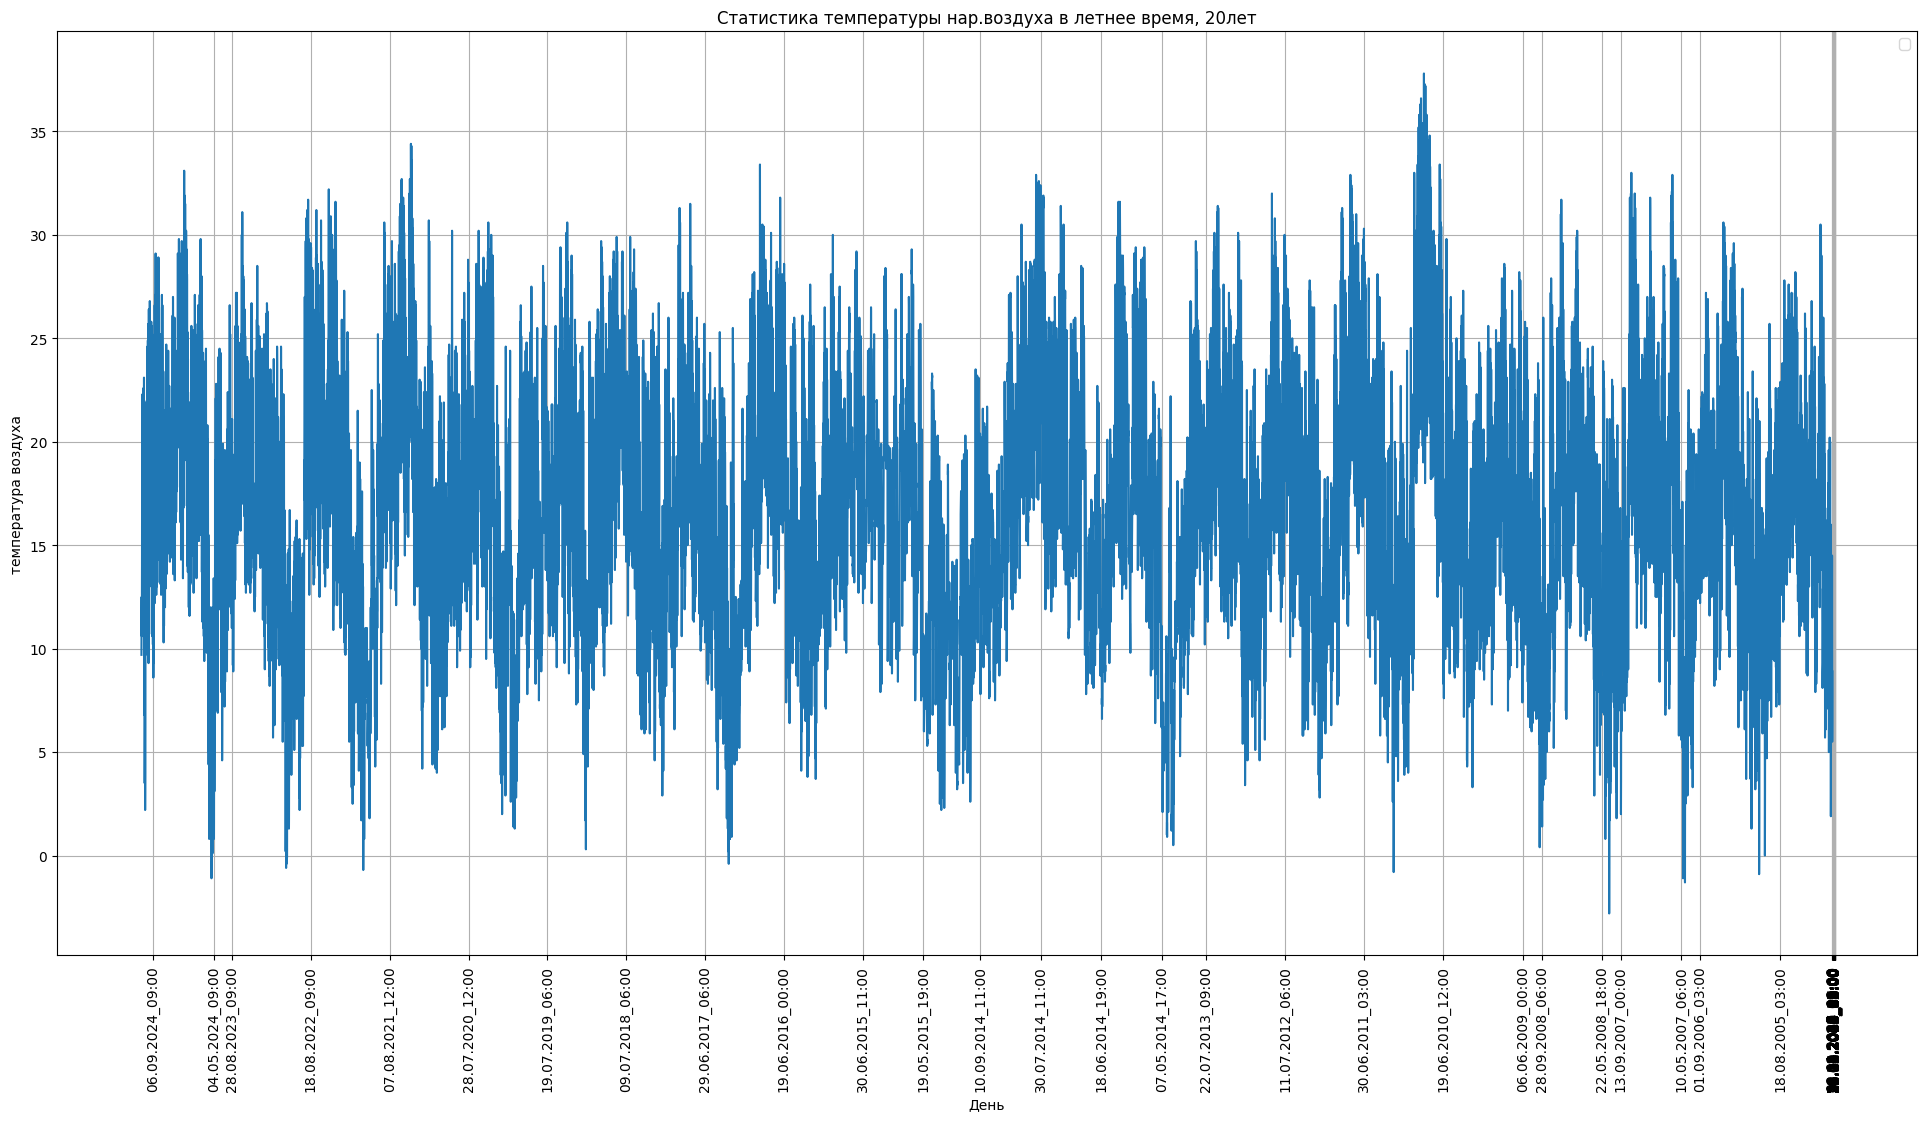

In [12]:


plt.figure(figsize=(24, 12), dpi=80)

fig, ax1 = plt.subplots(1, figsize=(24,12))

ax1.plot(df_not_heating_months.index, df_not_heating_months['T'])
ax1.set_xticks(df.index[::1000])
ax1.set_xticklabels(df.index[::1000], rotation=90)

plt.title("Статистика температуры нар.воздуха в летнее время, 20лет")
plt.xlabel('День')
plt.ylabel('температура воздуха')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\MID\AppData\Local\Temp\ipykernel_25872\3243250412.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1920x960 with 0 Axes>

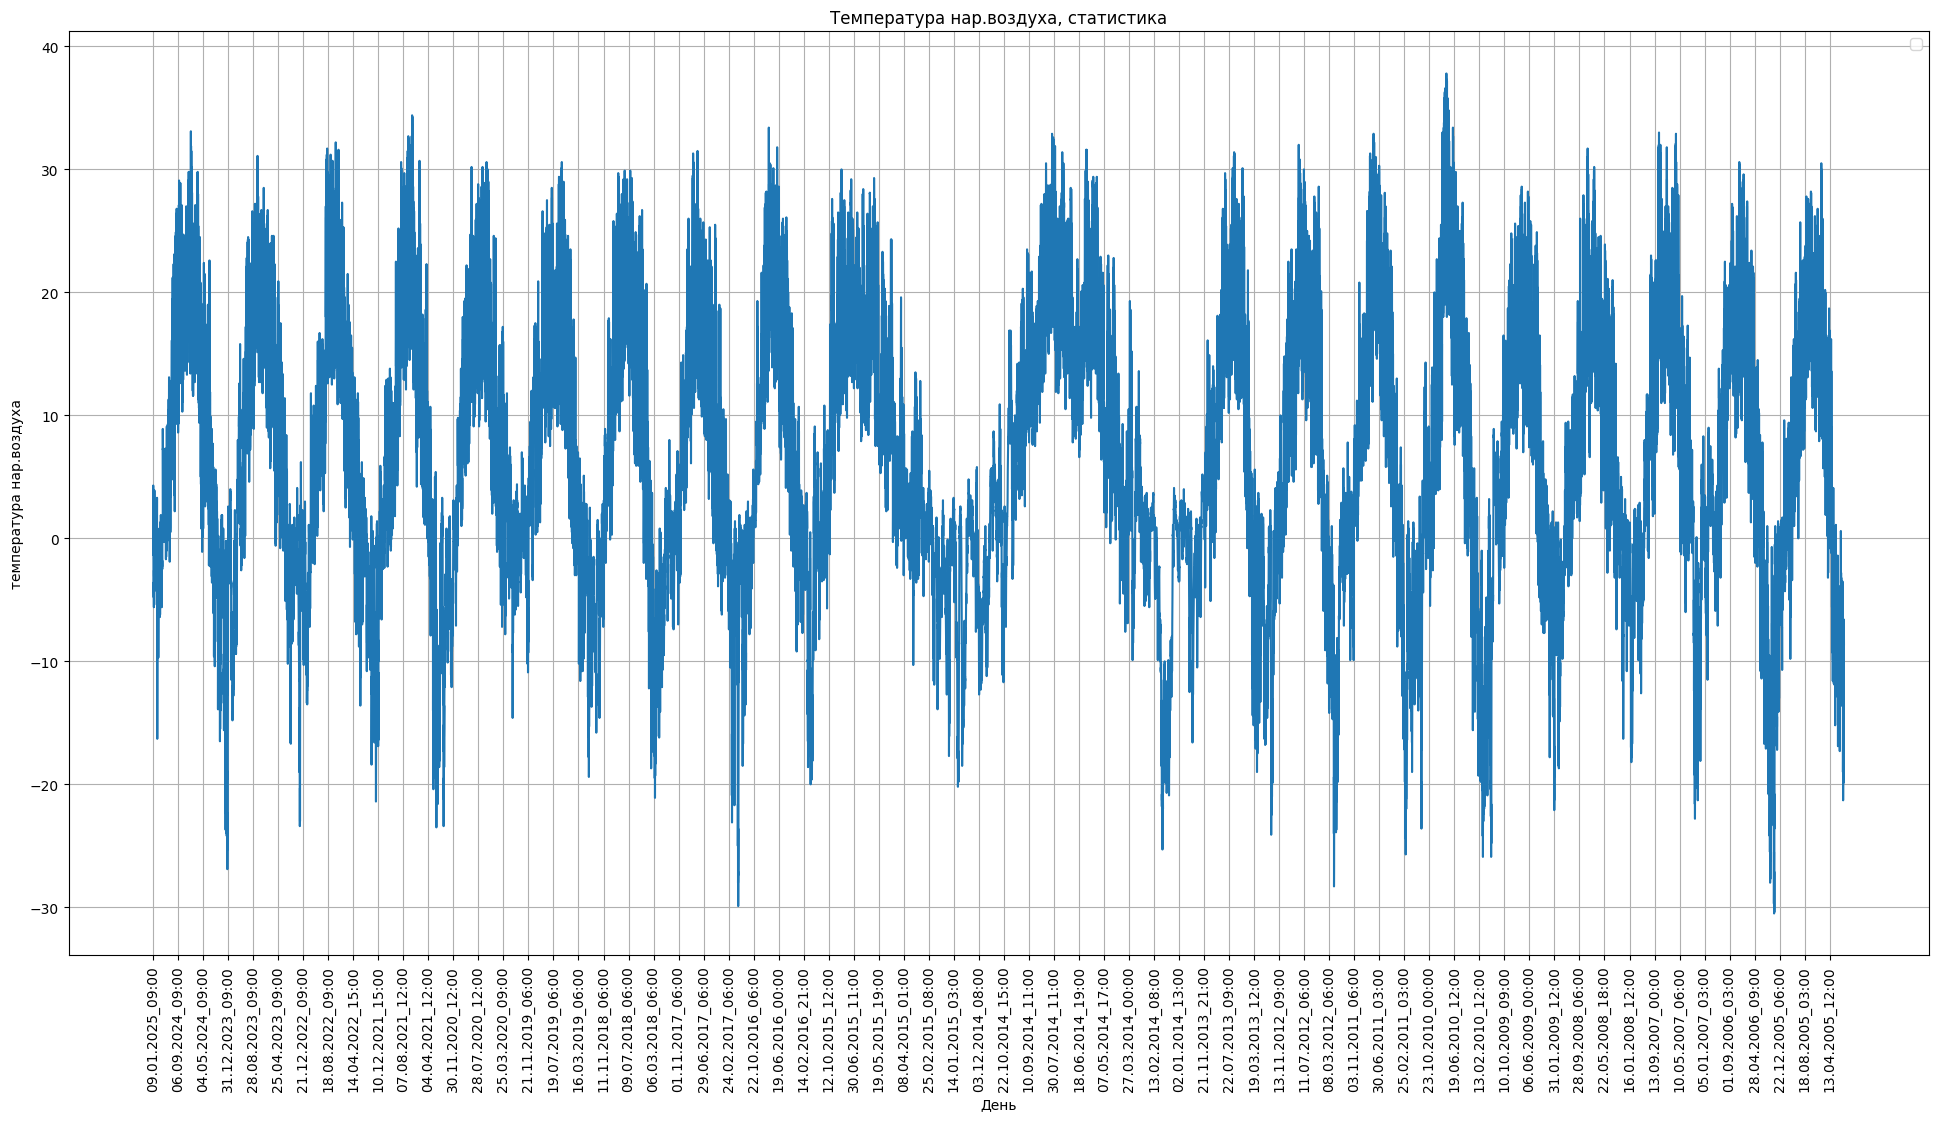

In [13]:
plot_df(df, 'T', 1000, 'Температура нар.воздуха, статистика', 'температура нар.воздуха')